# PRML Assignment 2

Aim: Write a script to implement following for the given dataset Bengaluru Housing Dataset - Datafile: Bengaluru Housing Dataset

### Exercise 1: Draw a scatterplot for the data mentioned for the given attributes

### Exercise 2: Perform Data pre-processing

In [38]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
# read data
data = pd.read_csv(r"C:\Users\Deena\Downloads\Bengaluru_House_Data.csv")

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# make another dataframe of the required columns
df = data[['total_sqft','price']].copy()

In [6]:
df

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
...,...,...
13315,3453,231.00
13316,3600,400.00
13317,1141,60.00
13318,4689,488.00


In [7]:
df.dtypes

total_sqft     object
price         float64
dtype: object

In [8]:
# using try-except for cleaning the total_sqft column values
avg = []
for s in df['total_sqft']:  
    try:
        avg.append(float(s))      # if the values only have numbers
    except:
        try:
            range_list = s.split('-')
            avg.append((range_list[0] + range_list[1]) / 2)      # if the values are in a range
        except:
            avg.append(0)     # 0 doesn't work as it is not showing in isnull

In [9]:
avg[:5]

[1056.0, 2600.0, 1440.0, 1521.0, 1200.0]

In [10]:
# add the new values as a new column in the dataframe
df['avg_area'] = avg

In [11]:
df.isnull().sum()

total_sqft    0
price         0
avg_area      0
dtype: int64

In [12]:
df.drop(['total_sqft'], axis=1, inplace=True)

In [13]:
# drop the rows having null values
df.dropna(inplace=True)

In [14]:
df

,price,avg_area
0,39.07,1056.0
1,120.00,2600.0
2,62.00,1440.0
3,95.00,1521.0
4,51.00,1200.0
...,...,...
13315,231.00,3453.0
13316,400.00,3600.0
13317,60.00,1141.0
13318,488.00,4689.0


In [15]:
# standardizing the data 
df = (df - df.mean()) / df.std()

In [16]:
df

,price,avg_area
0,-0.493353,-0.377680
1,0.049905,0.862754
2,-0.339431,-0.069178
3,-0.117913,-0.004104
4,-0.413271,-0.261992
...,...,...
13315,0.795013,1.548045
13316,1.929457,1.666143
13317,-0.352857,-0.309392
13318,2.520173,2.541034


In [17]:
X = df.iloc[:,0]
X

0       -0.493353
1        0.049905
2       -0.339431
3       -0.117913
4       -0.413271
           ...   
13315    0.795013
13316    1.929457
13317   -0.352857
13318    2.520173
13319   -0.641502
Name: price, Length: 13320, dtype: float64

In [18]:
Y = df.iloc[:,1]
Y

0       -0.377680
1        0.862754
2       -0.069178
3       -0.004104
4       -0.261992
           ...   
13315    1.548045
13316    1.666143
13317   -0.309392
13318    2.541034
13319   -0.784195
Name: avg_area, Length: 13320, dtype: float64

In [19]:
print(max(X), max(Y))

23.410050281709477 40.768714980216416


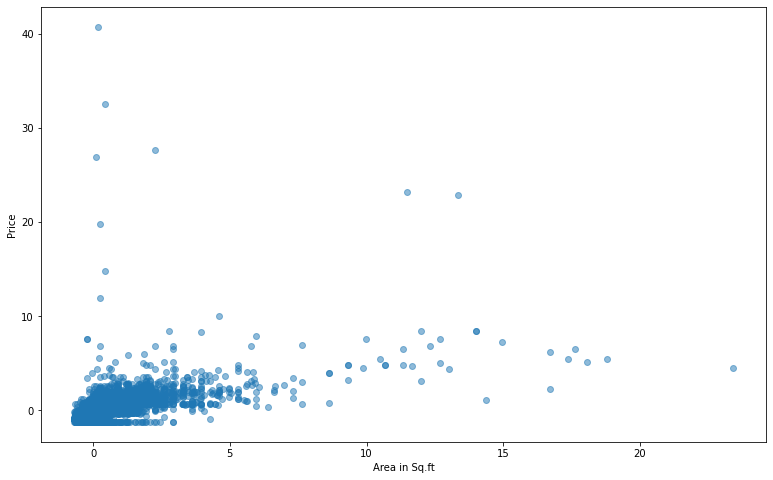

In [20]:
plt.figure(figsize=(13, 8))
plt.scatter(X,Y, alpha = 0.5)
plt.xlabel("Area in Sq.ft")
plt.ylabel("Price")
plt.show()

### EXERCISE-3: Performs gradient descent to learn theta (using the library and without using the library). Compare the values of ‘theta’ in both cases

In [21]:
# GRADIENT DESCENT WITHOUT USING THE LIBRARY

t0 = 0   # t0 - theta 0
t1 = 0   # t1 - theta 1

A = 0.002    # the learning Rate alpha
epochs = 1000  # the number of iterations to perform gradient descent

n = float(len(X)) # number of elements in X
print(n)

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = t1 * X + t0                       # the current predicted value of Y
    D_t1 = (-2/n) * sum(X * (Y - Y_pred))      # partial derivative wrt t1
    D_t0 = (-2/n) * sum(Y - Y_pred)            # partial derivative wrt t0
    t1 = t1 - A * D_t1                         # updatation of t1
    t0 = t0 - A * D_t0                         # updatation of t0

print (t0, t1)

13320.0
7.659870402296646e-17 0.5515896953597115


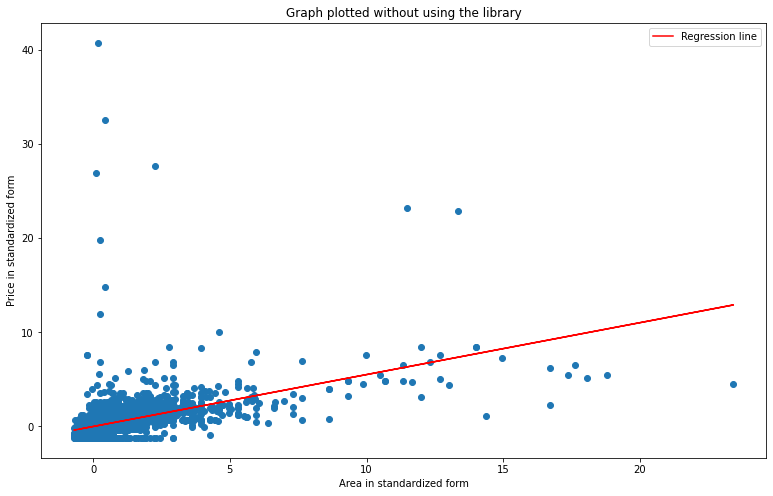

In [22]:
# plotting the regression line (WITHOUT LIBRARY)
Y_pred = t1 * X + t0

plt.figure(figsize=(13, 8))
plt.title("Graph plotted without using the library")
plt.scatter(X, Y)      # for the original data
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.plot(X, Y_pred, color='red', label="Regression line")  # regression line - predicted data
plt.xlabel("Area in standardized form")
plt.ylabel("Price in standardized form")
plt.legend()
plt.plot()
plt.show()

In [23]:
# PERFORMING THE GRADIENT DESCENT USING THE LIBRARY
x = df[['avg_area']].values
y = df['price'].values
model = LinearRegression()
model.fit(x,y)
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print(theta_0, theta_1)

5.15802751227814e-16 0.5618002969486114


In [24]:
# Difference between the two thetas
diff_Theta0 = theta_0 - t0
diff_Theta1 = theta_1 - t1
print("Difference between theta 0: ", diff_Theta0)
print("Difference between theta 1: ", diff_Theta1)

Difference between theta 0:  4.392040472048475e-16
Difference between theta 1:  0.01021060158889997


### EXERCISE-4: Splitting data into the training and testing, 60:40, 70:30, and 80:20.

In [25]:
# splitting between 60 : 40
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)
print(y_test)

[-0.09106178 -0.18503938 -0.40655801 ...  0.25128518  3.60762795
 -0.38306361]


In [26]:
# splitting between 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
print(x_train)

[[-0.38250007]
 [-0.26199165]
 [-0.7078728 ]
 ...
 [-0.28770011]
 [-0.27002554]
 [-0.17040525]]


In [27]:
# splitting between 80 : 20
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
print(x_test)

[[ 0.17987256]
 [-0.26199165]
 [ 0.11158445]
 ...
 [-0.05471716]
 [-0.10131375]
 [-0.53112712]]


### EXERCISE-5: Train linear regression model and test using Gradient Descent and using the library. Find out the limitation in both cases

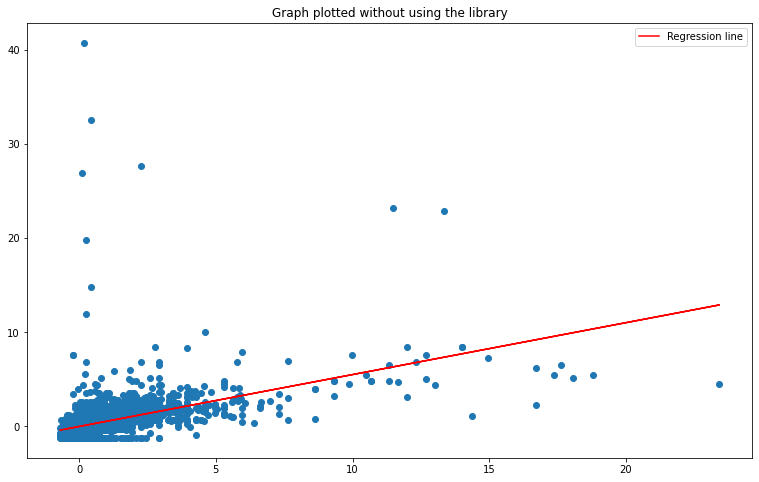

In [28]:
# plotting the regression line (WITHOUT LIBRARY)
Y_pred = t1 * X + t0

plt.figure(figsize=(13, 8))
plt.title("Graph plotted without using the library")
plt.scatter(X, Y)      # for the original data
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.plot(X, Y_pred, color='red', label="Regression line")  # regression line - predicted data
plt.legend()
plt.plot()
plt.show()

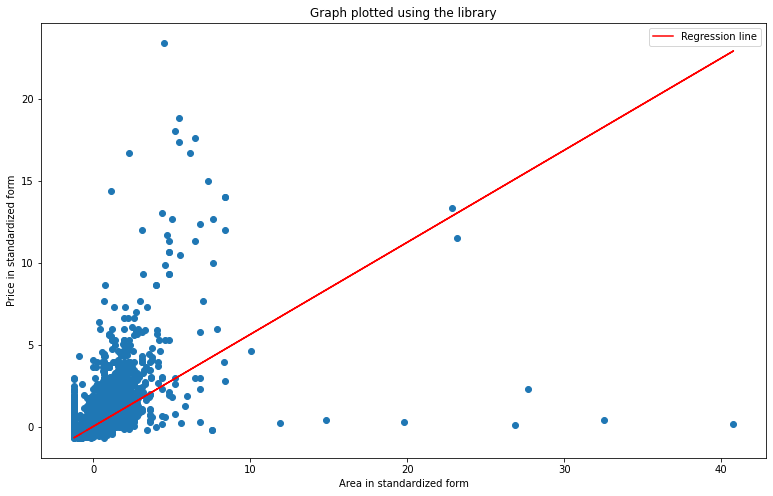

In [29]:
# plotting the regression line (WITH LIBRARY)
y_pred = theta_1*x + theta_0

plt.figure(figsize=(13, 8))
plt.title("Graph plotted using the library")
plt.scatter(x, y)      # for the original data
plt.plot(x, y_pred, color='red', label="Regression line")  # regression line - predicted data
plt.xlabel("Area in standardized form")
plt.ylabel("Price in standardized form")
plt.legend()
plt.plot()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Y, y_pred)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.43818325380484446


In [42]:
print("R2 Score when gradient descent is used: ",r2_score(Y, y_pred))

R2 Score when gradient descent is used:  0.8079810202456749
